# Resources and references
And the data are gethared from *https://investing.com*

# Data Info
In our data, the column names were not given but the order is CLOSE, OPEN, HIGH, LOW and CHANGE

Data type: EUR/USD daily data.

the dates between 01/01/1980 and 28/02/2019 were used for train, validation.

test data would be march april or even other future dates.

**important: data should be reversed after read with pandas. The dataset from the investing.com is reversed. This effects prediction.**

# Task Info

Binary classification.
Classifies if the given time will have a higher value or lower value.

Later: Regression
Tries to predict exact price.

# Purpose

- find out if using more data on daily forecasting is a good idea
- use regression to predict a value

# Imports and Mount google drive

In [0]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# json and pretty print
import json
import pprint

# to persist the numpy arrays data
import h5py

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# check if correct place
!ls '/content/gdrive/My Drive/deep_learning/_data/forex/daily_csv/'

 EUR_USD_1980_1990.csv	 EUR_USD_2019_jan_feb.csv
 EUR_USD_1991_2000.csv	'EUR_USD Historical Data.csv'
 EUR_USD_2001_2018.csv	'EUR_USD Historical Data.gsheet'


# Loading Data

## Functions of Data Handling

In [0]:
# Tries to concatenate a list of arrays into one array
def get_concatenated_dataset(d_list):
  result_data = d_list[0]
  for d in d_list[1:]:
    result_data = np.concatenate((result_data, d), axis=None)
    
  return result_data

# Tries to check if the concatenated list is correct.
def concatenate_length_check(d_list, concatenated):
  print("----------- length check -----------")
  total_length = 0
  for d in d_list:  
    total_length += len(d)
    print("length: " +str(len(d)))

  print("concatenated length "+str(len(concatenated)))
  if(len(concatenated) == total_length):
    print("concatenated length -----------> CORRECT")
  else:
    print("concatenated length -----------> WRONG")

## Read Data

In [0]:
# initialize file names
data_folder = "/content/gdrive/My Drive/deep_learning/_data/forex/daily_csv/"
data_filenames = []
data_filenames.append("EUR_USD_2001_2018.csv")
data_filenames.append("EUR_USD_1991_2000.csv")
data_filenames.append("EUR_USD_1980_1990.csv")

test_data_filenames = []
test_data_filenames.append("EUR_USD_2019_jan_feb.csv")

In [0]:
# get train data that will be both validation and train data in training mode
data_1 = pd.read_csv(data_folder+data_filenames[0])
data_2 = pd.read_csv(data_folder+data_filenames[1])
data_3 = pd.read_csv(data_folder+data_filenames[2])

# Get all data as list
data_list = [data_1, data_2, data_3]

test_data_list = [pd.read_csv(data_folder+test_data_filenames[0])]

In [0]:
# print for understand the context
# NOTE: it is reversed
data_3.tail()
#test_data_list[0].head()

,Date,Price,Open,High,Low,Change %
2806,"Jan 08, 1980",1.5108,1.5108,1.5108,1.5108,-0.40%
2807,"Jan 07, 1980",1.5168,1.5168,1.5168,1.5168,0.26%
2808,"Jan 04, 1980",1.5129,1.5129,1.5129,1.5129,-0.32%
2809,"Jan 03, 1980",1.5177,1.5177,1.5177,1.5177,0.18%
2810,"Jan 02, 1980",1.5149,1.5149,1.5149,1.5149,0.45%


## Read Train Data

In [0]:
# Get OPEN, HIGH, LOW, CLOSE columns in all data
open_data_list=[]
high_data_list=[]
low_data_list=[]
close_data_list=[]

for d in data_list:
  open_data_list.append(d['Open'].as_matrix())
  high_data_list.append(d['High'].as_matrix())
  low_data_list.append(d['Low'].as_matrix())
  close_data_list.append(d['Price'].as_matrix())
  
# And CONCATENATE all of them
all_open_data = get_concatenated_dataset(open_data_list)
all_high_data = get_concatenated_dataset(high_data_list)
all_low_data = get_concatenated_dataset(low_data_list)
all_close_data = get_concatenated_dataset(close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_data_list, all_open_data)
concatenate_length_check(high_data_list, all_high_data)
concatenate_length_check(low_data_list, all_low_data)
concatenate_length_check(close_data_list, all_close_data)

----------- length check -----------
length: 4696
length: 2603
length: 2811
concatenated length 10110
concatenated length -----------> CORRECT
----------- length check -----------
length: 4696
length: 2603
length: 2811
concatenated length 10110
concatenated length -----------> CORRECT
----------- length check -----------
length: 4696
length: 2603
length: 2811
concatenated length 10110
concatenated length -----------> CORRECT
----------- length check -----------
length: 4696
length: 2603
length: 2811
concatenated length 10110
concatenated length -----------> CORRECT


## Read Test Data

In [0]:
# Get OPEN, HIGH, LOW, CLOSE columns in all data
t_open_data_list=[]
t_high_data_list=[]
t_low_data_list=[]
t_close_data_list=[]

for d in test_data_list:
  t_open_data_list.append(d['Open'].as_matrix())
  t_high_data_list.append(d['High'].as_matrix())
  t_low_data_list.append(d['Low'].as_matrix())
  t_close_data_list.append(d['Price'].as_matrix())
  
# And CONCATENATE all of them
t_all_open_data = get_concatenated_dataset(t_open_data_list)
t_all_high_data = get_concatenated_dataset(t_high_data_list)
t_all_low_data = get_concatenated_dataset(t_low_data_list)
t_all_close_data = get_concatenated_dataset(t_close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(t_open_data_list, t_all_open_data)
concatenate_length_check(t_high_data_list, t_all_high_data)
concatenate_length_check(t_low_data_list, t_all_low_data)
concatenate_length_check(t_close_data_list, t_all_close_data)

----------- length check -----------
length: 63
concatenated length 63
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
concatenated length 63
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
concatenated length 63
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
concatenated length 63
concatenated length -----------> CORRECT


## Flip Data

In [0]:
# REVERSE THE DATA BEFORE CONTINUE
all_open_data = np.flip(all_open_data, 0)
all_high_data = np.flip(all_high_data, 0)
all_low_data = np.flip(all_low_data, 0)
all_close_data = np.flip(all_close_data, 0)

t_all_open_data = np.flip(t_all_open_data, 0)
t_all_high_data = np.flip(t_all_high_data, 0)
t_all_low_data = np.flip(t_all_low_data, 0)
t_all_close_data = np.flip(t_all_close_data, 0)

print("OPEN HIGH LOW CLOSE data were flipped successfully for both rain and test data.")


OPEN HIGH LOW CLOSE data were flipped successfully for both rain and test data.


In [0]:
all_open_data

array([1.5149, 1.5177, 1.5129, ..., 1.1353, 1.1429, 1.1443])

# General Values

In [0]:
# BATCH size of the lstm model
#BATCH_SIZES = [32, 64, 128, 256, 512]
BATCH_SIZE = 32

# How many of the past points were involved.
#WINDOWS = [32, 64, 128, 256, 512]
WINDOW = 32

# How many of data type is used as multivariate(open,high,low,close = 4)
EMB_SIZE = 4

# While training how many points should be ignored
STEP = 1

# Determines which time should be predictied
#(1 = 1 min further is predicted)
#(60 = 1 hour further is predicted)
FORECAST = 1

# Determines if the data is to be load.
LOAD = False

# Construct Data

## Functions

In [0]:
# ORIGINAL CHANEGD TO REGRESSION
def get_data_chunks(d_list, length, window=30, forecast=1, step=1):
  X = []
  Y = []
  for i in range(0, length, step):
    try:
      # Get windowed data
      o = d_list[0][i:i+window] # open
      h = d_list[1][i:i+window] # high
      l = d_list[2][i:i+window] # low
      c = d_list[3][i:i+window] # close

      # Normalize data
      # NO NORMALIZATION FOR NOW
      #o = (np.array(o) - np.mean(o)) / np.std(o)
      #h = (np.array(h) - np.mean(h)) / np.std(h)
      #l = (np.array(l) - np.mean(l)) / np.std(l)
      #c = (np.array(c) - np.mean(c)) / np.std(c)

      # x_i
      x_i = d_list[3][i:i+window]
      y_i = d_list[3][i+window+forecast]

      x_i = np.column_stack((o,h,l,c))
    except Exception as e:
      print(e)
      # break when the limit is not enough
      break

    X.append(x_i)
    Y.append(y_i)
  print("data chunks are ready...")
  return [X, Y]

def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_val = X[iXPercentage:]
    Y_val = y[iYPercentage:]

    return X_train, X_val, Y_train, Y_val

In [0]:
def save_data(x,y,x_test,y_test):
  # Save X, Y and X_test, Y_test
  save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
  filename="d_fx_multi_fcst_1980_2018"

  # Save Y
  y_h5 = h5py.File(save_folder+filename+"_y.h5", 'w')
  y_h5.create_dataset('dataset_Y', data=y)
  y_h5.close()
  print("Saving Y Completed")

  # Save X
  x_h5 = h5py.File(save_folder+filename+"_x.h5", 'w')
  x_h5.create_dataset('dataset_X', data=x)
  x_h5.close()
  print("Saving X Completed")

  # Save X_test
  x_test_h5 = h5py.File(save_folder+filename+"_x_test.h5", 'w')
  x_test_h5.create_dataset('dataset_X_test', data=x_test)
  x_test_h5.close()
  print("Saving X_test Completed")

  # Save Y_test
  y_test_h5 = h5py.File(save_folder+filename+"_y_test.h5", 'w')
  y_test_h5.create_dataset('dataset_Y_test', data=y_test)
  y_test_h5.close()
  print("Saving Y_test Completed")


In [0]:
def get_data(should_loaded, d_list, d_list_test, train_len, test_len, window):
  if not should_loaded:
    # PROCESSES WHOLE TRAIN SET
    X, Y = get_data_chunks(d_list, train_len, window=window, forecast=FORECAST, step=STEP)
    X_test, Y_test = get_data_chunks(d_list_test, test_len, window=window, forecast=FORECAST, step=STEP)

    X = np.array(X)
    Y = np.array(Y)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
  else:
    save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
    filename="d_fx_multi_fcst_1980_2018"
    
    h5f = h5py.File(save_folder+filename+"_x.h5",'r')
    X = h5f['dataset_X'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y.h5",'r')
    Y = h5f['dataset_Y'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_x_test.h5",'r')
    X_test = h5f['dataset_X_test'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y_test.h5",'r')
    Y_test = h5f['dataset_Y_test'][:]
    h5f.close()
    pass
  
  return [X, Y, X_test, Y_test]



## Get Data

In [0]:
X_list = []
Y_list = []
X_test_list = []
Y_test_list = []
if not LOAD:
  d_list = [all_open_data, all_high_data, all_low_data, all_close_data]
  d_list_test = [t_all_open_data, t_all_high_data, t_all_low_data, t_all_close_data]


  for w in [WINDOW]:
    print("getting data for window: "+str(w))
    X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                    d_list=d_list, 
                                    d_list_test=d_list_test, 
                                    train_len=len(all_close_data), 
                                    test_len=len(all_close_data), 
                                    window=w)
    X_list.append(X)
    Y_list.append(Y)
    X_test_list.append(X_test)
    Y_test_list.append(Y_test)
else:
    X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                d_list=None, 
                                d_list_test=None, 
                                train_len=0, 
                                test_len=0)
#if not LOAD: save_data(X, Y, X_test, Y_test)


getting data for window: 32
index 10110 is out of bounds for axis 0 with size 10110
data chunks are ready...
index 63 is out of bounds for axis 0 with size 63
data chunks are ready...


In [0]:
print(X_list[0].shape)
print(X_test_list[0].shape)


(10077, 32, 4)
(30, 32, 4)


In [0]:
X_train_list = []
X_val_list = []
Y_train_list = []
Y_val_list = []
for i in range(len(X_list)):
  X_train, X_val, Y_train, Y_val = get_train_validation(X_list[i], Y_list[i])
  X_train_list.append(X_train)
  X_val_list.append(X_val)
  Y_train_list.append(Y_train)
  Y_val_list.append(Y_val)
  
  print("OLD_shapes for windows: "+str(WINDOW))
  print(X_list[i].shape)
  print(Y_list[i].shape)
  print("*"*40)
  print("New Shapes for windows: "+str(WINDOW))
  print(X_train.shape)
  print(Y_train.shape)
  print(X_val.shape)
  print(Y_val.shape)
  print("-"*50)

OLD_shapes for windows: 32
(10077, 32, 4)
(10077,)
****************************************
New Shapes for windows: 32
(8061, 32, 4)
(8061,)
(2016, 32, 4)
(2016,)
--------------------------------------------------


In [0]:
def get_smooth_size(old_size, batch_size=32):
  new_size = old_size - old_size%batch_size
  print("Smoothed from: ["+str(old_size)+"] to: ["+str(new_size)+"]")
  return new_size

In [0]:
# MAKE THE DATA SMOOT FOR LSTM MODEL
WINDOWS = [WINDOW]
BATCH_SIZES = [BATCH_SIZE]
for i in range(len(WINDOWS)):
  train_smooth_size = get_smooth_size(X_train_list[i].shape[0], batch_size=BATCH_SIZES[i])
  test_smooth_size = get_smooth_size(X_test_list[i].shape[0], batch_size=BATCH_SIZES[i])
  val_smooth_size = get_smooth_size(X_val_list[i].shape[0], batch_size=BATCH_SIZES[i])

  X_train_list[i] = X_train_list[i][:train_smooth_size] 
  X_test_list[i] = X_test_list[i][:test_smooth_size] 
  X_val_list[i] = X_val_list[i][:val_smooth_size] 

  Y_train_list[i] = Y_train_list[i][:train_smooth_size]
  Y_test_list[i] = Y_test_list[i][:test_smooth_size]
  Y_val_list[i] = Y_val_list[i][:val_smooth_size]

Smoothed from: [8061] to: [8032]
Smoothed from: [30] to: [0]
Smoothed from: [2016] to: [2016]


## MODELS

In [0]:
def build_lstm_model_1(tensor_shape, batch_size=100, hidden_neurons=100):
  model = tf.keras.Sequential()
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1])))

  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1))
  return model

In [0]:
def build_lstm_model_2(tensor_shape, batch_size=100, hidden_neurons=100):
  model = tf.keras.Sequential()
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]),return_sequences=True))
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1])))
#  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1))
  return model

In [0]:
#TODO: weight initialization and L2 regularization
# A linear layer with L2 regularization of factor 0.02


def build_lstm_model_3(tensor_shape, batch_size=100, hidden_neurons=100, pooling_size=2):
  # L2 norm regularizer
  regularizer = tf.keras.regularizers.l2(0.01)
  
  # XAVIER INITIALIZER
  initializer = tf.keras.initializers.glorot_uniform()
  
  model = tf.keras.Sequential()
  
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, 
                        batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]),
                        recurrent_regularizer=regularizer,
                        bias_regularizer=regularizer, 
                        kernel_regularizer=regularizer,
                        recurrent_initializer=initializer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer
                       ))

# TODO

#  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu', 
                         kernel_regularizer=regularizer, 
                         bias_regularizer=regularizer,
                         kernel_initializer=initializer,
                         bias_initializer=initializer))
  
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1))
  return model

In [0]:
def build_conv1d_model_1(tensor_shape, filters=64, kernel_size=3, pooling_size=2, dropout=0.5):
  #todo: maybe add strides
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=tensor_shape)
  
  #------------- FIRST CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same",
                        input_shape=tensor_shape,
                        batch_input_shape=(None, tensor_shape[0], tensor_shape[1]),
                        activation='relu')(placeholder_input)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  
  # CONSIDER:  model = layers.BatchNormalization(model)  
  # ------------- Second CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same", 
                        activation='relu')(model)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  # ------------- DROPOUT & FLATTEN ------------- 
  model = layers.Dropout(dropout)(model)
  model = layers.Flatten()(model)
  
  
  model = layers.Dense(32, activation='relu')(model)
  model = layers.Dropout(dropout)(model)
  # not sure if this necessary 1
  #model = layers.Activation(activation='relu')(model)
  
  prediction = layers.Dense(1)(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

In [0]:
def build_conv1d_model_2(tensor_shape, filters=64, kernel_size=3, pooling_size=2, dropout=0.5):
  # L2 norm regularizer
  regularizer = tf.keras.regularizers.l2(0.01)
  
  # XAVIER INITIALIZER
  initializer = tf.keras.initializers.glorot_uniform()
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=tensor_shape)
  
  #------------- FIRST CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same",
                        input_shape=tensor_shape,
                        batch_input_shape=(None, tensor_shape[0], tensor_shape[1]),
                        activation='relu',                         
                        kernel_regularizer=regularizer, 
                        bias_regularizer=regularizer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer)(placeholder_input)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  
  # CONSIDER:  model = layers.BatchNormalization(model)  
  # ------------- Second CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same", 
                        activation='relu',
                        kernel_regularizer=regularizer, 
                        bias_regularizer=regularizer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer)(model)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  # ------------- DROPOUT & FLATTEN ------------- 
  model = layers.Dropout(dropout)(model)
  model = layers.Flatten()(model)
  
  
  model = layers.Dense(32, activation='relu',
                       kernel_regularizer=regularizer, 
                       bias_regularizer=regularizer,
                       kernel_initializer=initializer,
                       bias_initializer=initializer)(model)
  
  model = layers.Dropout(dropout)(model)
  # not sure if this necessary 1
  #model = layers.Activation(activation='relu')(model)
  
  prediction = layers.Dense(1)(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

In [0]:
#KERNEL_SIZES = [3,4,5]
#FILTER_SIZES = [32, 64, 128]
#NEURONS = [100, 200]
neuron = 100
kernel_size = 3
filter_size = 32

In [0]:
# NOTE: model3 seems nice.
shape = (X_train_list[i].shape[1], X_train_list[i].shape[2])
x1 = build_lstm_model_1(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
x2 = build_lstm_model_2(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
x3 = build_lstm_model_3(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
c1 = build_conv1d_model_1(tensor_shape=shape, filters=filter_size, kernel_size=kernel_size)
c2 = build_conv1d_model_2(tensor_shape=shape, filters=filter_size, kernel_size=kernel_size)
models = [x1, x2, x3, c1, c2]

In [0]:
for m in models:
  print(m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 100)                 42000     
_________________________________________________________________
batch_normalization_v1_3 (Ba (32, 100)                 400       
_________________________________________________________________
dense_10 (Dense)             (32, 32)                  3232      
_________________________________________________________________
dropout_7 (Dropout)          (32, 32)                  0         
_________________________________________________________________
dense_11 (Dense)             (32, 1)                   33        
Total params: 45,665
Trainable params: 45,465
Non-trainable params: 200
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

In [0]:
#OPTIMIZER
opt_1 = 'adam'
opt_2 = tf.keras.optimizers.RMSprop(0.001)
opt_3 = tf.keras.optimizers.Adadelta(0.01)
#opt = tf.keras.optimizers.RMSprop()

loss_func = tf.keras.losses.mean_squared_error
metrics =  ['mean_absolute_error', 'mean_squared_error']

#tf.train.AdamOptimizer(learning_rate=0.002)

# CALLBACKS
save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
fp = save_folder+"d_fx_multi_fcst_1980_2018.hdf5"
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=fp, verbose=1, save_best_only=True)

#COMPILE
for m in models:
  m.compile(optimizer=opt_3, loss=loss_func, metrics=metrics)

In [0]:
EPOCH_COUNT = 1000 
patience=0.1*EPOCH_COUNT
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


histories = []
for m in models:
  history_m = m.fit(
      X_train_list[i], Y_train_list[i], 
      epochs = 100, batch_size = BATCH_SIZE, verbose=1, 
      validation_data=(X_val_list[i], Y_val_list[i]),
      callbacks=[early_stop, checkpointer])
    
  histories.append(history_m)
  

Train on 8032 samples, validate on 2016 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8032 [============================>.] - ETA: 0s - loss: 0.9989 - mean_absolute_error: 0.9163 - mean_squared_error: 0.9989
Epoch 00001: val_loss improved from inf to 1.10317, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/d_fx_multi_fcst_1980_2018.hdf5
8032/8032 [==============================] - 23s 3ms/sample - loss: 0.9974 - mean_absolute_error: 0.9154 - mean_squared_error: 0.9974 - val_loss: 1.1032 - val_mean_absolute_error: 1.0498 - val_mean_squared_error: 1.1032
Epoch 2/100
8000/8032 [============================>.] - ETA: 0s - loss: 0.6841 - mean_absolute_error: 0.7397 - mean_squared_error: 0.6841
Epoch 00002: val_loss improved from 1.10317 to 0.87868, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/d_fx_multi_fcst_1980_2018.hdf5
8032/8032 [==============================] - 21s 3ms/sample - loss: 0.6844 - mean_absolu

In [0]:
histories

In [0]:
histories[0].history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

# Plot

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

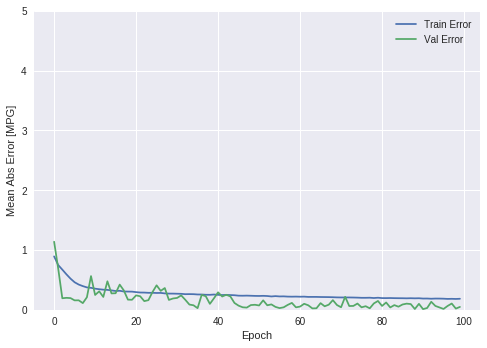

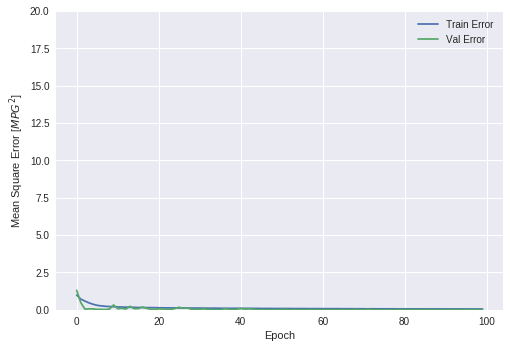

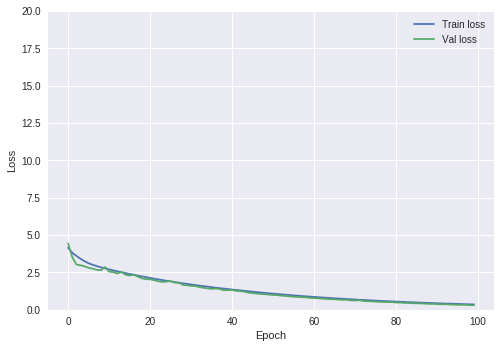

In [0]:
#models[2].evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
a = X_val[2014:]
a.shape

(2, 32, 4)

In [0]:
b = Y_val[2014:]
b.shape

(2,)

In [0]:
#t1 = np.arange(2*7*4).reshape(2,7,4)
#t2 = (np.arange(2*7*4)+10000).reshape(2,7,4)
c = X_test
r = np.concatenate((a, c), axis=0)
r.shape

(32, 32, 4)

In [0]:
t = np.concatenate((b, Y_test), axis=0)

In [0]:
t.shape

(32,)

In [0]:
#print("r0:"+str(r[0]))
print("t0:"+str(t[0]))
pred = models[2].predict(r)

t0:1.1438


In [0]:
for m in models:
  pred = m.predict(r)
  acc = 0
  for i in range(len(pred)):
    acc += (pred[i]/t[i])*100

  acc /= len(pred)
  print(acc)

[54.30987]
[64.725975]
[95.712456]
[87.4359]
[94.76881]


In [0]:
pred_4 = models[-1].predict(X_test)

In [0]:
pred_4[0]

array([1.07751], dtype=float32)

In [0]:
Y_test[0]

1.1295

AttributeError: ignored